In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
learning_rate = .001

In [3]:
# sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# derivative of sigmoid activation function
def dsigmoid(x):
    return x * (1 - x)

In [4]:
# data from https://archive.ics.uci.edu/ml/datasets/Spambase
spamdata = pd.read_csv('./spamdata.csv', header=None, index_col=None)
#spamdata = spamdata.sample(n=30, random_state=1)
target_outputs = (spamdata.iloc[:,-1]).values.reshape(-1, 1)

In [5]:
np.random.seed(1)
# initialize weights
weights_1 = np.random.randn(57,25)*np.sqrt(2/4)
weights_2 = np.random.randn(25,1)*np.sqrt(2/3)

# initialize bias
bias_1 = 1
bias_2 = 1

In [6]:
#takes in the inputs and adjusts the weights accordingly
def train(batch, target_outputs):
    global weights_2
    global weights_1
    global bias_1
    global bias_2

    ## feedforward
    layer_1_output = sigmoid(np.dot(batch, weights_1) + bias_1)
    output = sigmoid(np.dot(layer_1_output, weights_2) + bias_2)

    ## backprop
    
    # output layer
    dcost_dpred = target_outputs - output
    dpred_dz = dsigmoid(output)
    dz_dw2 = layer_1_output
    
    dcost_dw2 = np.dot(dz_dw2.T, dcost_dpred * dpred_dz)
    dcost_b2 = dcost_dpred * dpred_dz
    
    dcost_doutput1 = np.dot(dcost_dpred * dpred_dz, weights_2.T)
    doutput1_dz = dsigmoid(layer_1_output)
    dz_dw1 = batch
    
    dcost_dw1 = np.dot(dz_dw1.T, dcost_doutput1 * doutput1_dz)
    dcost_b1 = dcost_doutput1 * doutput1_dz
    
    # update weights
    weights_2 += dcost_dw2 * learning_rate
    weights_1 += dcost_dw1 * learning_rate
    
    # update biases
    bias_2 += np.average(dcost_b2) * learning_rate
    bias_1 += np.average(dcost_b1) * learning_rate

    return dcost_dpred, output

In [7]:
error_list = []
index = []
input_data = preprocessing.scale(spamdata.drop(spamdata.columns[-1],axis=1).values)

for i in range(4001):
    nn_error, nn_output = train(input_data, target_outputs)
    mse = np.average(nn_error * nn_error)
    error_list.append(mse)
    index.append(i)
    if (i % 1000) == 0:
        print(mse)
        #print(nn_output)

0.5750750243392858
0.0399286927996982
0.03275545932079566
0.0271357963237125
0.02288531970032965


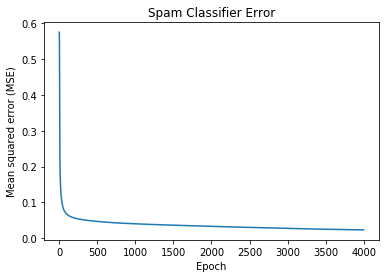

In [8]:
# plot mse vs. epoch
plt.plot(index, error_list)
plt.xlabel('Epoch')
plt.ylabel('Mean squared error (MSE)')
plt.title('Spam Classifier Error')
plt.show()

In [9]:
error_list[4000] #0.02288531970032965

0.02288531970032965